# **Lógica Fuzzy: Agrupamento com Fuzzy c-means**

Artigo: https://www.sciencedirect.com/science/article/pii/0098300484900207

O Algoritmo Fuzzy c-means (FCM) é um método de agrupamento que permite que um dado pertença a dois ou mais agrupamentos. Este método (desenvolvido por Dunn em 1973 e melhorado por Bezdek em 1981) é frequentemente usado no reconhecimento de padrões.

# Instalação e importação das bibliotecas

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 15.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=8e3570b4e50db9e59aad9459365aaf8d48f61251eae0a1151c8c25cfcf31a14c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy
skfuzzy.__version__

'0.4.2'

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Carregamento da base de dados

In [ ]:
base = pd.read_csv('/content/credit_card_clients.csv', header = 1)
base.shape

(30000, 25)

LIMIT_BAL =  limite do cartão

PAY_ = pagou o não pagou

BILL_AMT = valor da fatura do cartão

PAY_AMT = o quanto da fatura foi pago

default payment next month = se o cliente vai ou não pagar a próxima fatura

***Para este estudo utilizarei as variáveis imite do cartão e valor da fatura do cartão.***

In [ ]:
base

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [ ]:
# Criando uma coluna que armazene o somatório das colunas BILL_AMT:

base['BILL TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [ ]:
base

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0         -1  ...          0          0         0       689         0   
1          0  ...       3455       3261         0      1000      1000   
2          0  ...      14948      15549      1518      1500      1000   
3          0  ...      28959      29547      2000      2019      1200   
4          0  ...      19146      19131      2000     36681     10000   
...      ...  ...        ...        ...       ...       ...       ...   
29995      0  ...      31237      15980      8500     20000      5003   
29996     -1  ...       5190          0      1837      3526      8998   
29997     -1  ...      20582      19357         0         0     22000   
29998      0  ...      11855      48944     85900      3409      1178   
29999      0  ...      32428      15313      2078      1800      1430   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  BILL TOTAL  
0             0         0         0                           1        7704  
1          1000         0      2000                           1       17077  
2          1000      1000      5000                           0      101653  
3          1100      1069      1000                           0      231334  
4          9000       689       679                           0      109339  
...         ...       ...       ...                         ...         ...  
29995      3047      5000      1000                           0      725349  
29996       129         0         0                           0       21182  
29997      4200      2000      3100                           1       70496  
29998      1926     52964      1804                           1      266611  
29999      1000      1000      1000                           1      230874  

[30000 rows x 26 columns]

In [ ]:
# Média de limite do cartão de crédito dos clientes desta base:

base['LIMIT_BAL'].mean()

167484.32266666667

In [ ]:
# Média de gastos do cartão de crédito dos clientes desta base:

base['BILL TOTAL'].mean()

269861.6712

# Pré-processamento da base de dados

In [ ]:
# Selecionando os atributos que serão utilizados para converter os valores para numpy:

X = base.iloc[:, [1,25]].values

In [ ]:
# Limite na primeira coluna e total de gastos no segunda:

X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [ ]:
# Valores mínimos e máximos:

X.min(), X.max()

(-336259, 5263883)

In [ ]:
# Normalizando os dados para um intervalo entre 0 e 1:

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[0.01010101, 0.06142041],
       [0.11111111, 0.06309411],
       [0.08080808, 0.07819659],
       ...,
       [0.02020202, 0.07263298],
       [0.07070707, 0.10765263],
       [0.04040404, 0.10127118]])

In [ ]:
X.min(), X.max()

(0.0, 1.0)

In [ ]:
X.shape

(30000, 2)

In [ ]:
# Matriz tranposta que é necessária no skfuzzy:

X.T

array([[0.01010101, 0.11111111, 0.08080808, ..., 0.02020202, 0.07070707,
        0.04040404],
       [0.06142041, 0.06309411, 0.07819659, ..., 0.07263298, 0.10765263,
        0.10127118]])

# Agrupamento com Fuzzy c-means

- Documentação: https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.cluster.html

Parâmetros da função

data = base de dados em matriz transposta

c = quantidade de grupos

para os outros utilizei os parametros padrões

m =  funçaõ de pertinência para verificar o quanto cada registro vai pertencer ao grupo

error = critério de parada

maxiter = número máximo de repetições permitidas

init = inicialização do algoritmo

In [ ]:
agrupamento = skfuzzy.cmeans(data = X.T, c = 5, m = 2, error = 0.005, maxiter = 1000, init=None)

In [ ]:
agrupamento # retorna matrizes do resultado contendo valor de centróide, pertinencia ...

(array([[0.16260219, 0.08378884],
        [0.04080986, 0.08652722],
        [0.46176589, 0.10708841],
        [0.2275198 , 0.24091536],
        [0.29902802, 0.08126694]]),
 array([[0.05953567, 0.57469875, 0.18678076, ..., 0.0288351 , 0.1224168 ,
         0.01395949],
        [0.89894438, 0.32229516, 0.75210483, ..., 0.95235488, 0.82342166,
         0.9777792 ],
        [0.00686306, 0.01417074, 0.00860116, ..., 0.002999  , 0.00721577,
         0.00119786],
        [0.0177934 , 0.03918065, 0.02615439, ..., 0.00825111, 0.0260569 ,
         0.00390211],
        [0.01686349, 0.04965471, 0.02635886, ..., 0.00755992, 0.02088886,
         0.00316133]]),
 array([[0.28503778, 0.16286792, 0.0403245 , ..., 0.02742802, 0.08177694,
         0.13417406],
        [0.13192444, 0.31437078, 0.12862561, ..., 0.18604013, 0.16174766,
         0.17378679],
        [0.04014938, 0.10487476, 0.30232751, ..., 0.30614599, 0.0870913 ,
         0.20555884],
        [0.20402135, 0.22515576, 0.2630456 , ..., 0.256688

In [ ]:
len(agrupamento)

7

In [ ]:
previsoes_porcentagem = agrupamento[1] # resultado do primeiro agrupamento
previsoes_porcentagem.shape

(5, 30000)

In [ ]:
previsoes_porcentagem

array([[0.05953567, 0.57469875, 0.18678076, ..., 0.0288351 , 0.1224168 ,
        0.01395949],
       [0.89894438, 0.32229516, 0.75210483, ..., 0.95235488, 0.82342166,
        0.9777792 ],
       [0.00686306, 0.01417074, 0.00860116, ..., 0.002999  , 0.00721577,
        0.00119786],
       [0.0177934 , 0.03918065, 0.02615439, ..., 0.00825111, 0.0260569 ,
        0.00390211],
       [0.01686349, 0.04965471, 0.02635886, ..., 0.00755992, 0.02088886,
        0.00316133]])

In [ ]:
# Maior valor de cada linha:

previsoes = previsoes_porcentagem.argmax(axis = 0)
previsoes

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Quantidade de registros para cada grupo:

np.unique(previsoes, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 7614, 13082,  2010,  3189,  4105]))

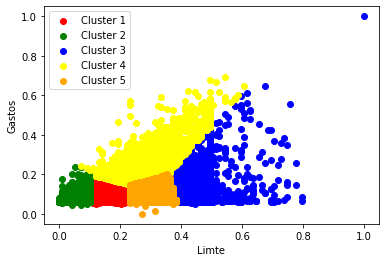

In [ ]:
# Grafico dos grupos:

plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], c = 'blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(X[previsoes == 4, 0], X[previsoes == 4, 1], c = 'orange', label = 'Cluster 5')
plt.xlabel('Limte')
plt.ylabel('Gastos')
plt.legend();

Vermelho = tem pouco limite e gasta pouco
Amarelo = tem muito limite e gasta pouco
Azul = tem muito limite e gasta muito

# Escolha do ideal do número de clusters

Havia definido inicialmente 5 grupos, mas sem certeza se é o ideal.

FPC =  coeficiente de partição fuzzy, é uma métrica que diz o quão limpo os dados são descritos por um determinado modelo, conforme a quantidade de clusters maior ou menor será essa métrica

O for executa o código do agrupamento considerando vários tamanhos para c e a métrica FPC mostra qual o melhor c

In [ ]:
fpcs = []
for n_clusters in range(2, 10):
  #print(n_clusters)
  centroides, previsoes, _, _, _, _, fpc = skfuzzy.cmeans(data = X.T, c = n_clusters, m = 2, error = 0.005, maxiter = 1000, init=None)
  fpcs.append(fpc)

In [ ]:
fpcs # o primeiro número é o maior, sendo também o melhor que representa c = 2

[0.805775313687852,
 0.7255205077442501,
 0.7051325891317252,
 0.646524704790097,
 0.6425855138881538,
 0.6186399457707945,
 0.6026338849490445,
 0.5760168214537708]

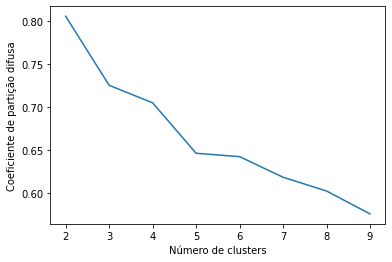

In [ ]:
# Grafico de interpretação do FPCS:

fig, ax = plt.subplots()
ax.plot(range(2,10), fpcs)
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Coeficiente de partição difusa');

# Novo agrupamento após o FPCS

In [ ]:
# Agrupamento considerando 2 clusters:

agrupamento = skfuzzy.cmeans(data = X.T, c = 2, m = 2, error=0.005, maxiter=1000, init=None)

In [ ]:
previsoes_porcentagem = agrupamento[1] # posição 1 porcentagens
previsoes = previsoes_porcentagem.argmax(axis=0) # grupos
previsoes, np.unique(previsoes, return_counts=True) # contagem

(array([1, 1, 1, ..., 1, 1, 1]), (array([0, 1]), array([ 9749, 20251])))

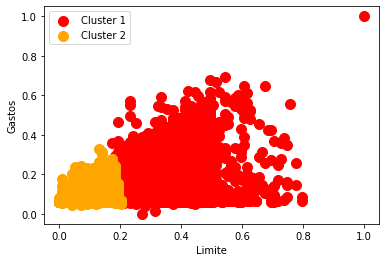

In [ ]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();

Análise do gráfico: As pessoas do primeiro cluster são aquelas que possuem o limite do cartão de crédito baixo e gastm relativamente pouco, enquanto as pessoas do segundo cluster tem mais limite e a maioria gasta mais.

In [ ]:
centroides = agrupamento[0] # centros de cada cluster
centroides

array([[0.31603844, 0.12217018],
       [0.07776294, 0.09533244]])

In [ ]:
centroides = scaler.inverse_transform(centroides) # redefinindo a variável centroide para o formato df para melhor interpretação
centroides = pd.DataFrame(data = centroides, columns = ['Limite', 'Gastos'])
centroides

Limite         Gastos
0  322878.055463  347911.375186
1   86985.312967  197616.215629

Interpretação: o centróide mostra o valor do limite e do gasto. Dividindo os grupos em limite maior, gasto maior tendo o centróide próximo e limite menor, gasto menor tendo o centróide distante.

Conclusão: a lógica fuzzy pode ser utilizada para agrupar os dados e fornecer Insight.

# Adicionando ao datafarame original a coluna de grupo

In [ ]:
previsoes, previsoes.shape

(array([1, 1, 1, ..., 1, 1, 1]), (30000,))

In [ ]:
base_grupos = pd.concat([base, pd.DataFrame({'grupo': previsoes})], axis = 1)
base_grupos

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0         -1  ...          0         0       689         0         0   
1          0  ...       3261         0      1000      1000      1000   
2          0  ...      15549      1518      1500      1000      1000   
3          0  ...      29547      2000      2019      1200      1100   
4          0  ...      19131      2000     36681     10000      9000   
...      ...  ...        ...       ...       ...       ...       ...   
29995      0  ...      15980      8500     20000      5003      3047   
29996     -1  ...          0      1837      3526      8998       129   
29997     -1  ...      19357         0         0     22000      4200   
29998      0  ...      48944     85900      3409      1178      1926   
29999      0  ...      15313      2078      1800      1430      1000   

       PAY_AMT5  PAY_AMT6  default payment next month  BILL TOTAL  grupo  
0             0         0                           1        7704      1  
1             0      2000                           1       17077      1  
2          1000      5000                           0      101653      1  
3          1069      1000                           0      231334      1  
4           689       679                           0      109339      1  
...         ...       ...                         ...         ...    ...  
29995      5000      1000                           0      725349      0  
29996         0         0                           0       21182      1  
29997      2000      3100                           1       70496      1  
29998     52964      1804                           1      266611      1  
29999      1000      1000                           1      230874      1  

[30000 rows x 27 columns]